In [2]:
# Getting the current working directory:
    
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
os.chdir(r'C:\Users\Usuario\OneDrive\Escritorio\Dallas\22Sum-Forecas\Data')  

os.getcwd()

'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Dallas\\22Sum-Forecas\\Data'

In [4]:
# Setting up charting formats:
    
# optional plot parameters
    
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 5.0]
plt.rcParams['font.size']= 18  
    
plt.style.available   # Check what are the styles available for Chart formats

plt.style.use('fivethirtyeight')       # Assign FiveThirtyEight style  

In [5]:
import os
import pandas as pd
df=pd.read_csv('HOUST1FNSA.csv',index_col=0,parse_dates=True)
df


,HOUST1FNSA
DATE,
1959-01-01,75.7
1959-02-01,78.8
1959-03-01,102.2
1959-04-01,122.3
1959-05-01,123.8
...,...
2022-02-01,85.0
2022-03-01,100.1
2022-04-01,109.7


In [6]:
# cv_ets():


In [7]:
# Define the run_ets() function:

def run_ets(train,test):
    from statsmodels.tsa.exponential_smoothing.ets import ETSModel
    from statsmodels.tools.eval_measures import rmse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    import matplotlib.pyplot as plt
    train=train.astype('float64')    # we are changing the datatype to float64, before running the ETS model to avoid errors
    test=test.astype('float64')      # we are changing the datatype to float64, before running the ETS model to avoid errors
    # ETS model
    model = ETSModel(train, error='add', trend='add', seasonal='add' , damped_trend=True)     # you can change the 'add' to 'mul' if you need or add any other parameters here
    fit = model.fit(maxiter=10000)
    # now do the test on the test dataset, to see how well the model can predict the test data
    pred_f = fit.forecast(steps=len(test))      # for a specific number of periods into the future, matching the length of the test dataset
    pred_f.index
    meanf = pred_f
    dates = pred_f.index
    # error stats
    rmse = rmse(test,meanf)
    mape = mean_absolute_percentage_error(test,meanf)
    # output for print
    output = 'RMSE : '+str(rmse) + '  |  MAPE : '+str(mape)
    # now plot the forecast with train/test
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(train, label='Train')
    ax.plot(test,label='Test')
    ax.plot(meanf,label='Forecast')
    #ax.plot(locals()[z],label='Fcast'+ str(j))
    ax.set_ylabel('')
    ax.set_title('Cross Validation Split : ETS')
    ax.legend(); 
    return output

In [8]:
# define the cv_ets() function:
    
def cv_ets(ts, number_of_splits):
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit(number_of_splits)
    tscv =tscv.split(ts) 
    i=0
    for train_index, test_index in tscv:
        locals()["train"+str(i+1)], locals()["test"+str(i+1)] = df.iloc[train_index,0], df.iloc[test_index,0]    #  To understand what the local() doing here : https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
        locals()["CV"+str(i+1)] = run_ets(locals()["train"+str(i+1)],locals()["test"+str(i+1)]) 
        i=i+1
    # now print the CV results as a table
    j=1
    for j in range(1,number_of_splits+1):
        x = 'CV' + str(j)
        print('Run '+str(j) + ' ' + locals()[x])
        j=j+1
    return 



C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Run 1 RMSE : 35.45885781688957  |  MAPE : 0.2894953475558896
Run 2 RMSE : 17.067978805140502  |  MAPE : 0.19683291702001965
Run 3 RMSE : 30.47183954864632  |  MAPE : 0.296242831467771
Run 4 RMSE : 45.040867617821114  |  MAPE : 0.7334353998698451
Run 5 RMSE : 33.19360211331571  |  MAPE : 0.40650088189212


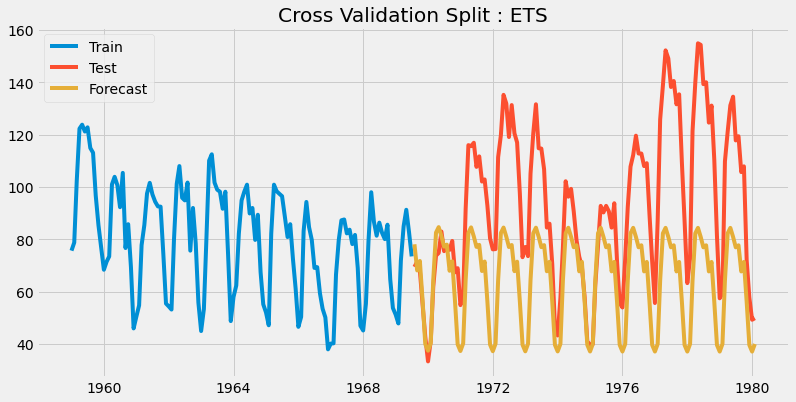

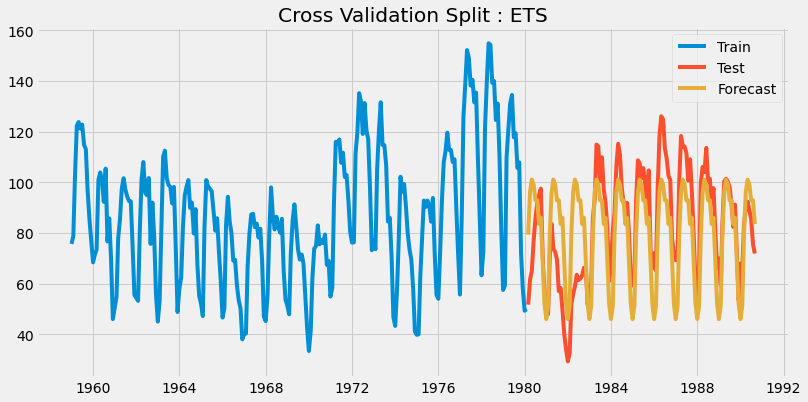

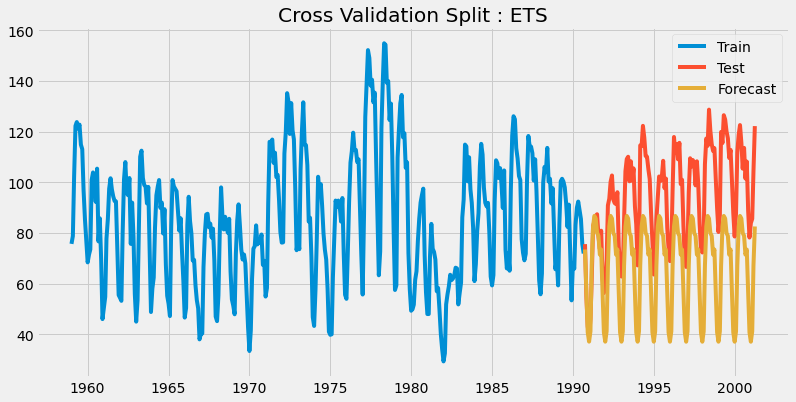

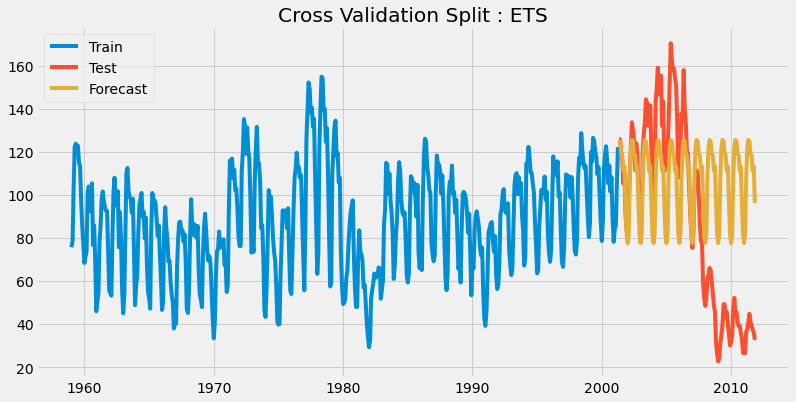

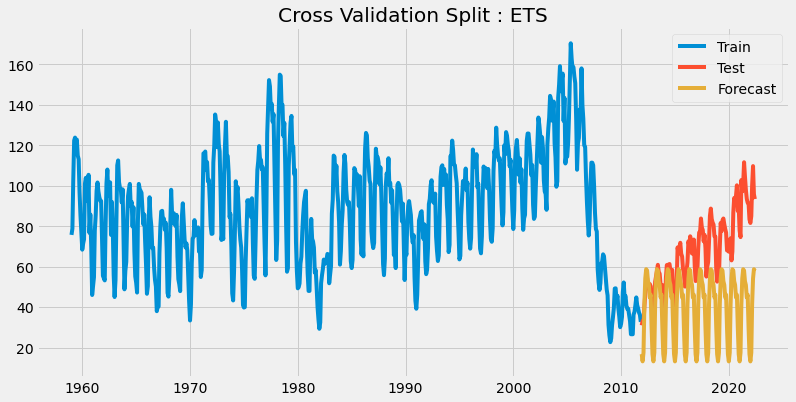

In [9]:
# use the CV_ETS() function:
    
cv_ets(df,5)